In [235]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [236]:
#reading the dataset
sales= pd.read_csv("BlackFriday.csv")
sales.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [237]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [238]:
#finding the null values
sales.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

In [239]:
#number of columns and rows in the dataset
sales.shape

(537577, 12)

## Analyzing the columns

In [240]:
sales.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [241]:
sales['Product_ID']

0         P00069042
1         P00248942
2         P00087842
3         P00085442
4         P00285442
            ...    
537572    P00193542
537573    P00111142
537574    P00345942
537575    P00285842
537576    P00118242
Name: Product_ID, Length: 537577, dtype: object

## How many users in the system

In [242]:
sales['User_ID'].unique()

array([1000001, 1000002, 1000003, ..., 1004113, 1005391, 1001529])

In [243]:
sales['User_ID'].nunique()

5891

In [244]:
#So there are 5891 unique users in the system

In [245]:
sales["Product_ID"].nunique()

3623

In [246]:
#we have 3623 unique products in the system

In [247]:
#how many unique genders in the system
sales.Gender.unique()

array(['F', 'M'], dtype=object)

In [248]:
#How many unique ages in the system
sales.Age.unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [249]:
sales.Occupation.unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6])

In [250]:
sales.City_Category.unique()
#the cities the users living to analyze who are the people purchasing the blackfriday sales

array(['A', 'C', 'B'], dtype=object)

In [251]:
sales.Stay_In_Current_City_Years.unique()
#the number of years that user stay in that city

array(['2', '4+', '3', '1', '0'], dtype=object)

In [252]:
sales.Marital_Status.unique()
#either the user is married or unmarried

array([0, 1])

In [253]:
sales['Purchase'].mean()
#how much money does people spent in the black friday sales

np.float64(9333.859852635065)

In [254]:
#automating the analzing the columns
for column in sales.columns:
    print(column,"=",sales[column].nunique())

User_ID = 5891
Product_ID = 3623
Gender = 2
Age = 7
Occupation = 21
City_Category = 3
Stay_In_Current_City_Years = 5
Marital_Status = 2
Product_Category_1 = 18
Product_Category_2 = 17
Product_Category_3 = 15
Purchase = 17959


In [255]:
#removing the product category 2 and 3 due to more missing values in the dataset 
del sales['Product_Category_2']
del sales['Product_Category_3']
sales.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Purchase'],
      dtype='object')

## Analyzing the Gender

In [256]:
#lets see the head of the dataframe
sales.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [257]:
gender = sales.groupby('Gender').Gender.count()
#this is the count of males and females purchasing in the blackfriday sales
#so the males are more than females

In [258]:
#now we want ot display the data in the barplot
gender.plot.pie(y = 'Gender',figsize=(6,6),autopct= "%.2f",title="Sales by Gender")

<Axes: title={'center': 'Sales by Gender'}, ylabel='Gender'>

In [259]:
gender.plot(kind = 'bar',figsize=(8,4))

<Axes: title={'center': 'Sales by Gender'}, xlabel='Gender', ylabel='Gender'>

In [260]:
#to specify the amounts spent by different types of gender for male spent amound and female spent amount
gender_purchase = sales.groupby('Gender').Purchase.sum()
gender_purchase

Gender
F    1164624021
M    3853044357
Name: Purchase, dtype: int64

In [261]:
gender_purchase.plot(kind='bar', figsize=(8, 4), title='Purchase Amount by Gender')

<Axes: title={'center': 'Purchase Amount by Gender'}, xlabel='Gender', ylabel='Gender'>

In [262]:
gender_purchase.plot(kind='pie', figsize=(8, 8), title='Purchase Amount by Gender',autopct = "%.2f")

<Axes: title={'center': 'Purchase Amount by Gender'}, xlabel='Gender', ylabel='Purchase'>

In [263]:
#if i want to knew how much each gender spending we need to use average to know how much each one spending money
gender_mean_purchase = sales.groupby("Gender").Purchase.mean()
gender_mean_purchase

Gender
F    8809.761349
M    9504.771713
Name: Purchase, dtype: float64

In [264]:
"""so we can also plot the graphs so that understand how 
a normal average male or female spend money"""
gender_mean_purchase.plot(kind = 'pie',figsize = (8,8),title = 'Average Spending Per Gender',autopct = "%.2f")


<Axes: title={'center': 'Average Spending Per Gender'}, xlabel='Gender', ylabel='Purchase'>

## Analyzing the Age & Martial Status

In [265]:
sales.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


### How many purchases are made by the people from age 0-17,18-## and so on

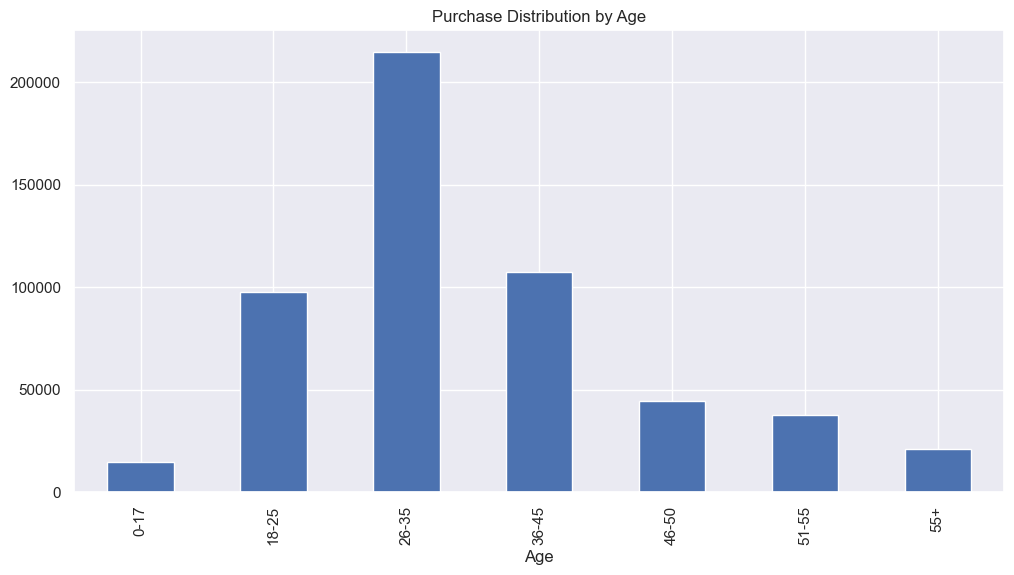

In [315]:
sales.groupby('Age').size().plot(kind = 'bar',title = 'Purchase Distribution by Age',figsize = (12,6))
plt.show()

In [267]:
## so the people from age 18 - 45 are purchasing maximum


### No.of unique products purchased by each age category

In [268]:
uniq_age_purchase = []
for i in sales.Age.unique():
    count = sales[sales['Age'] == i].Product_ID.nunique()
    print(f"The no.of unique products purchased by {i} Age Group is : {count}")
    uniq_age_purchase.append([i,count])
uniq_age_purchase
age_purchase = pd.DataFrame(uniq_age_purchase,columns = ['Age','Products'])
##Created a dataframe that stores this age purchases information

The no.of unique products purchased by 0-17 Age Group is : 2300
The no.of unique products purchased by 55+ Age Group is : 2573
The no.of unique products purchased by 26-35 Age Group is : 3419
The no.of unique products purchased by 46-50 Age Group is : 3099
The no.of unique products purchased by 51-55 Age Group is : 2877
The no.of unique products purchased by 36-45 Age Group is : 3318
The no.of unique products purchased by 18-25 Age Group is : 3213


In [269]:
age_purchase.head(5)

,Age,Products
0,0-17,2300
1,55+,2573
2,26-35,3419
3,46-50,3099
4,51-55,2877


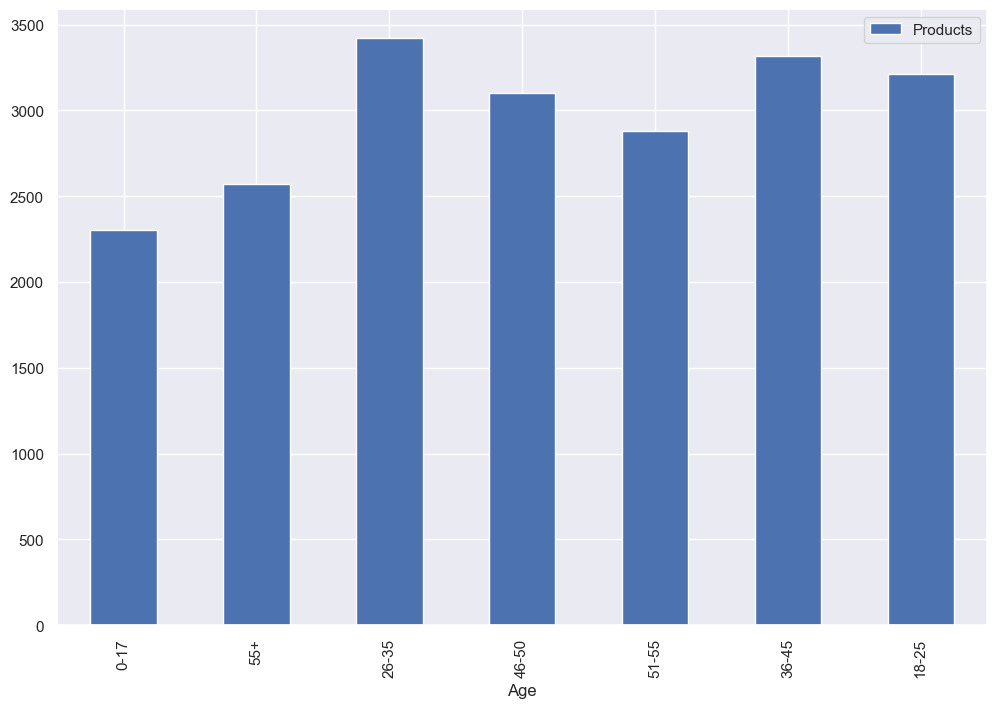

In [316]:
age_purchase.plot(kind = 'bar',x = 'Age',figsize=(12,8))
plt.show()

### How much amount spent by age

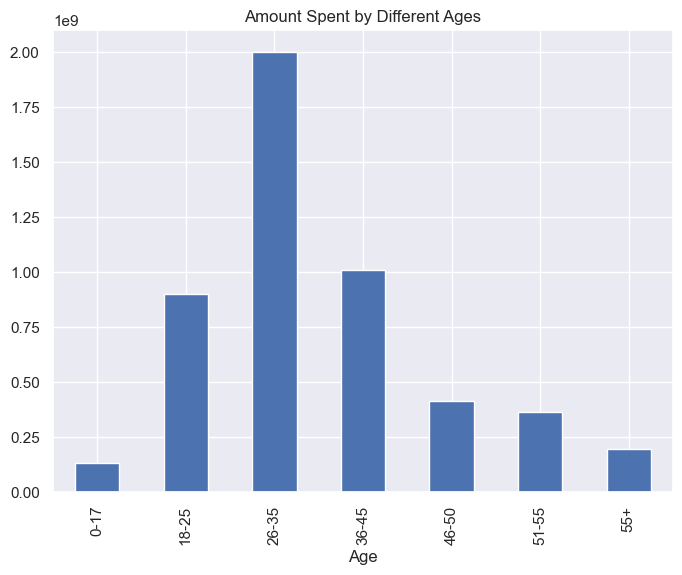

In [317]:
sales.groupby("Age").Purchase.sum().plot(kind= 'bar',figsize=(8,6),x = 'Age',y='Amount Spent by Age',title = "Amount Spent by Different Ages")
plt.show()

### Average money spent by different Ages

#### Bar Chart

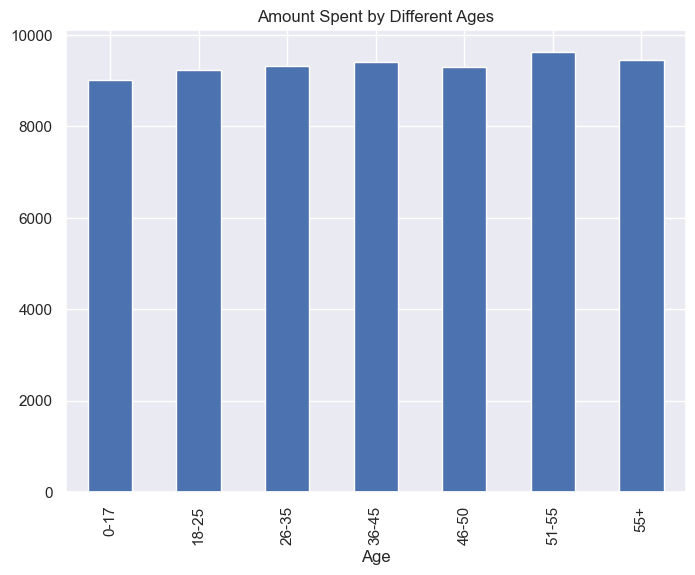

In [318]:
sales.groupby("Age").Purchase.mean().plot(kind= 'bar',figsize=(8,6),x = 'Age',y='Amount Spent by Age',title = "Amount Spent by Different Ages")
plt.show()

#### Pie Chart

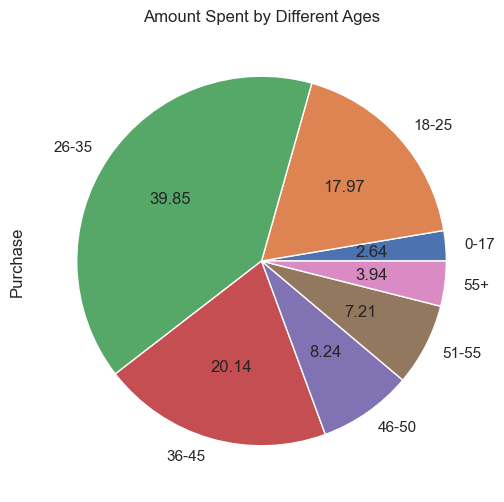

In [319]:
sales.groupby("Age").Purchase.sum().plot(kind= 'pie',figsize=(8,6),title = "Amount Spent by Different Ages",autopct = "%.2f")
plt.show()

## Multi Column Analysis

### Age and Gender Analysis

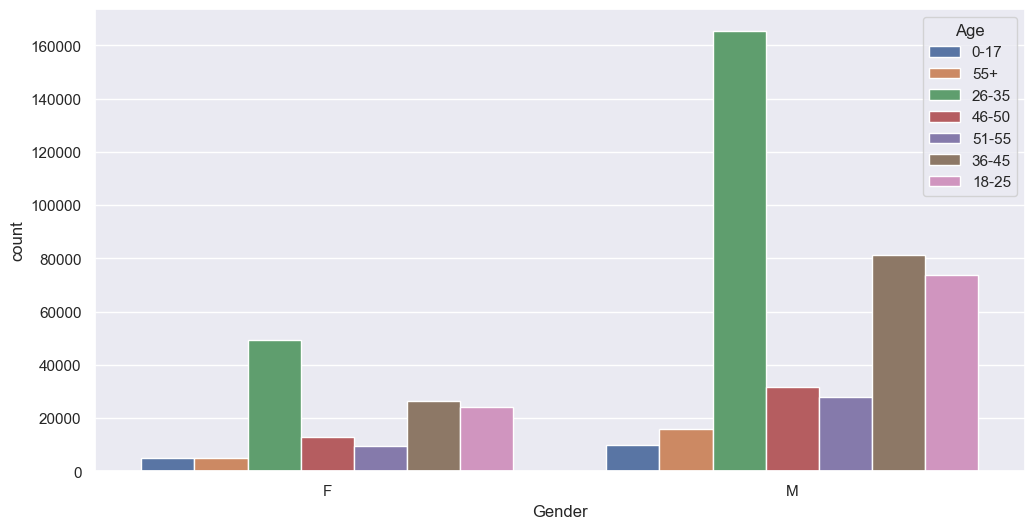

In [320]:
sns.set(rc = {'figure.figsize':(12,6)})
sns.countplot(x = 'Gender',hue = 'Age',data = sales)
plt.show()

### Marital Status and Gender Analysis

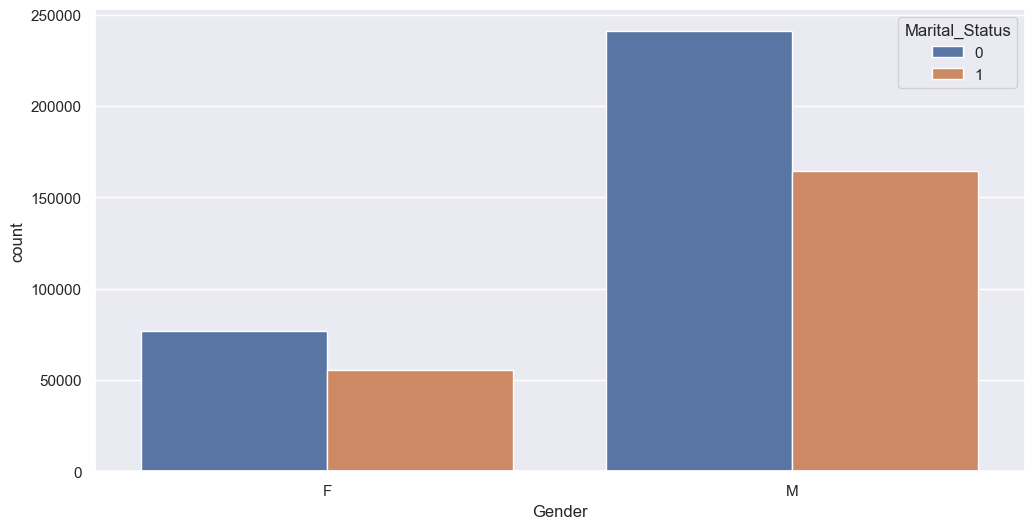

In [321]:
sns.set(rc = {'figure.figsize':(12,6)})
sns.countplot(x = 'Gender',hue = 'Marital_Status',data = sales)
plt.show()

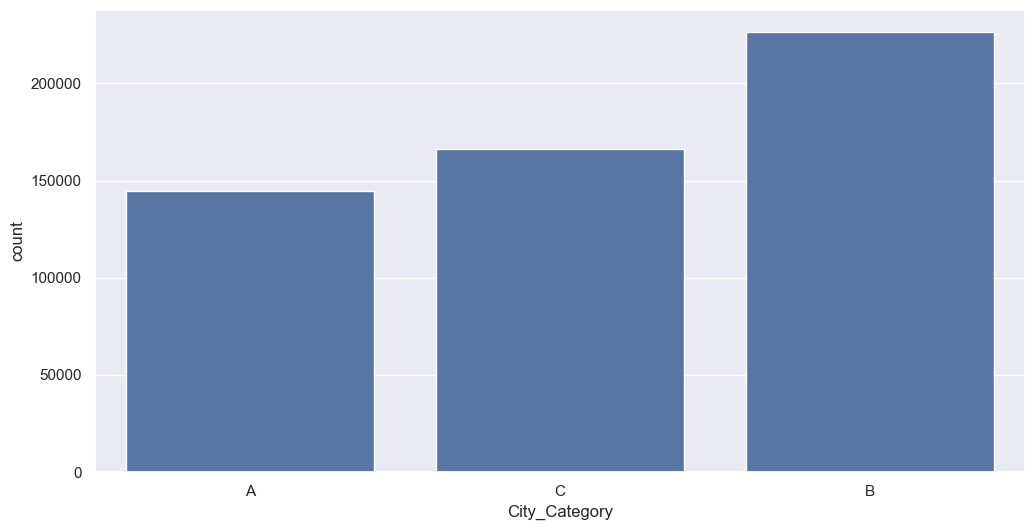

In [322]:
sns.countplot(x = sales.City_Category)
plt.show()

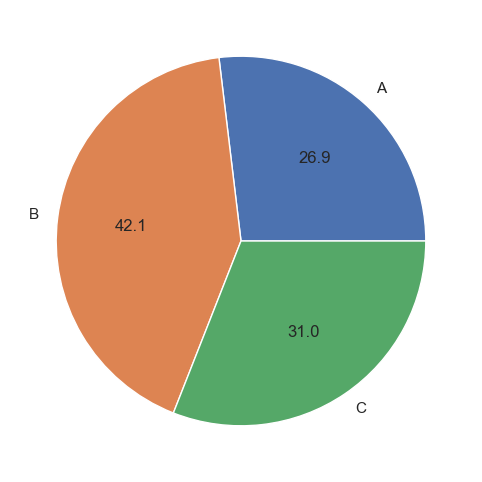

In [323]:
sales.groupby('City_Category').size().plot(kind = 'pie',autopct = "%.1f")
plt.show()

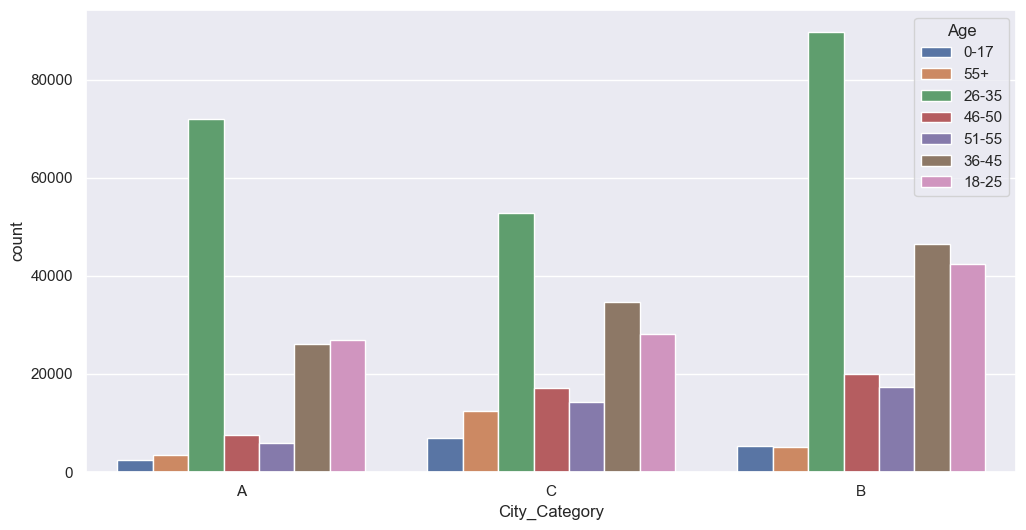

In [324]:
sns.countplot(x = "City_Category",hue = 'Age',data = sales)
plt.show()
#Age distribution over the cities

### How the martial status affects the purchase during the sales

In [279]:
sales.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Purchase'],
      dtype='object')

In [280]:
purchase_by_maritalStatus = sales.groupby(["Gender",'Marital_Status']).Purchase.sum().reset_index()
purchase_by_maritalStatus.head()

,Gender,Marital_Status,Purchase
0,F,0,673815717
1,F,1,490808304
2,M,0,2292473783
3,M,1,1560570574


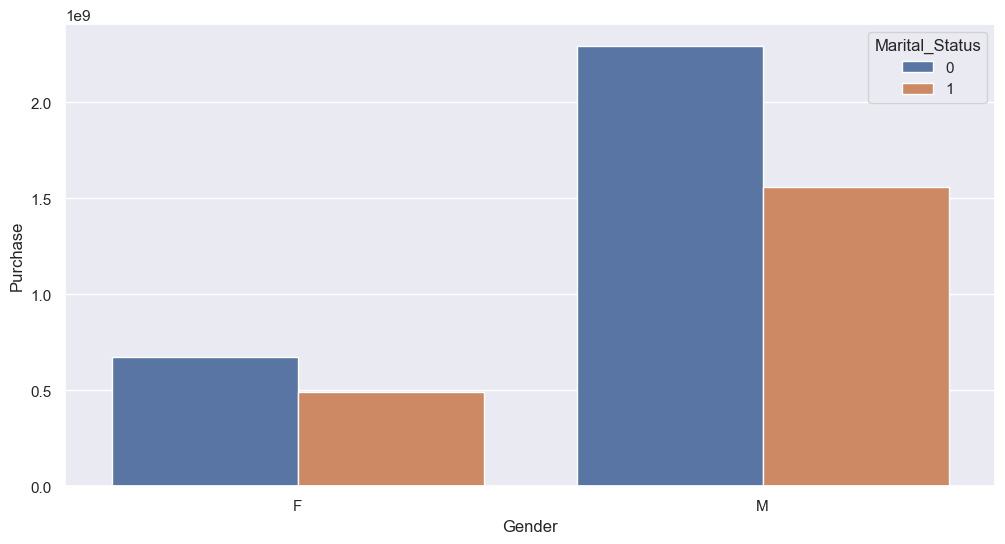

In [325]:
##now we can plot the bar graph
sns.barplot(x = "Gender",y = "Purchase",hue = 'Marital_Status',data = purchase_by_maritalStatus)
plt.show()

#### So from this we can understood that Unmarried Men will shop mostly and Married Women purchase is very less and overally men will purchase mostly according to the purchase amount

### Now how the City Category affects the purchase

In [282]:
purchase_by_city = sales.groupby(["City_Category"]).Purchase.sum().reset_index()
purchase_by_city

,City_Category,Purchase
0,A,1295668797
1,B,2083431612
2,C,1638567969


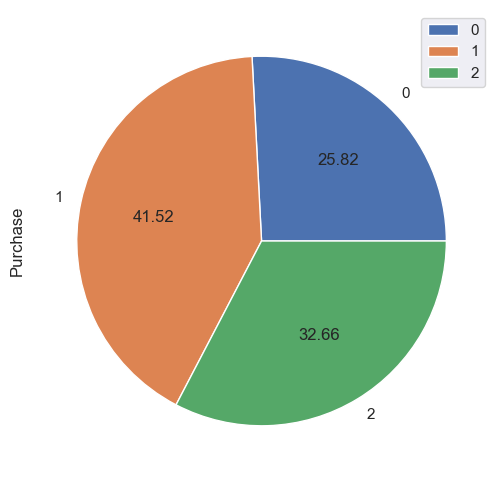

In [326]:
purchase_by_city.plot(kind = 'pie',autopct = "%.2f",x = "City_Category",y = "Purchase")
plt.show()

### We can Also Analyze by Bar Plots

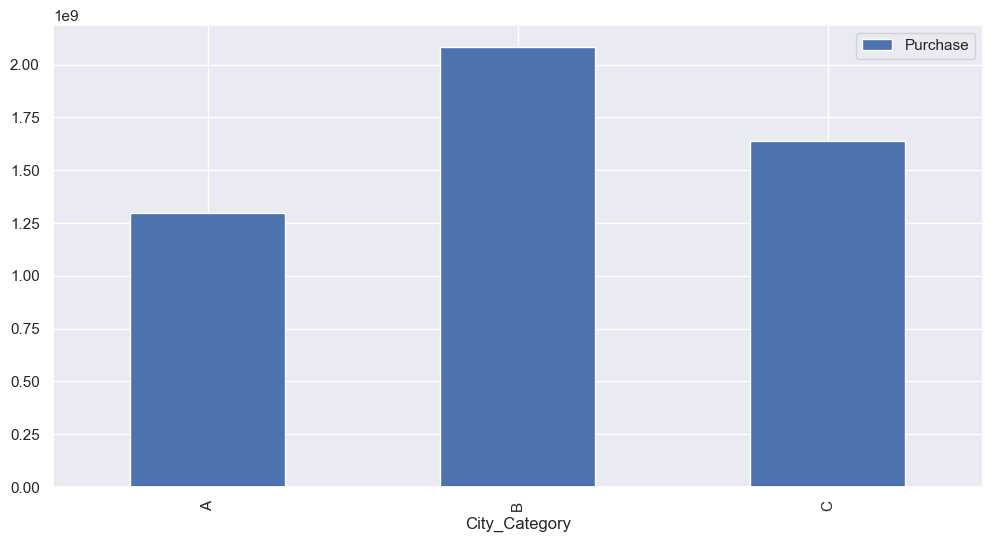

In [327]:
purchase_by_city.plot(kind = 'bar',x = "City_Category",y = "Purchase")
plt.show()

### Bivariate Analysis of Occupation and Products Analysis

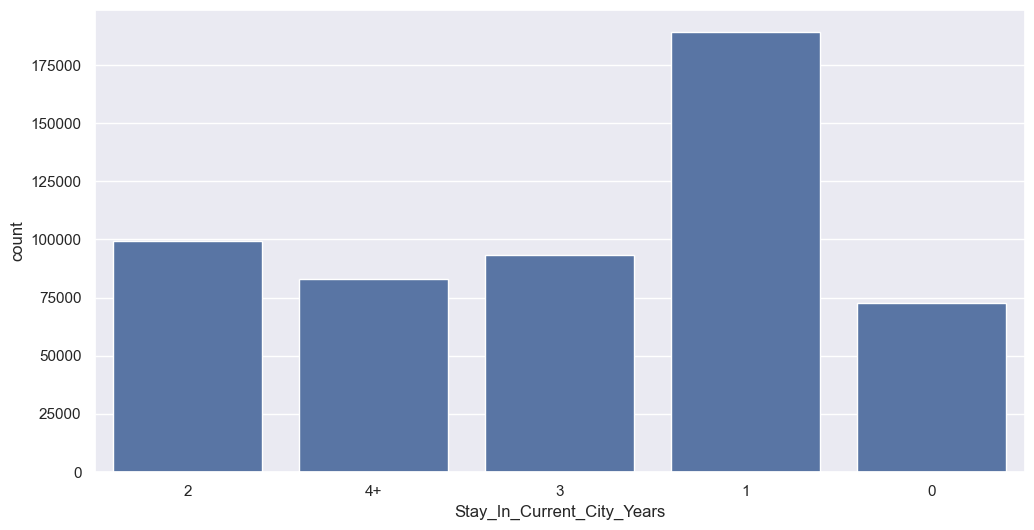

In [328]:
sns.countplot(x = sales.Stay_In_Current_City_Years,data = sales)
plt.show()

<p>We can see that people new with 1 year experience with the living city buy more that other people in the city</p>

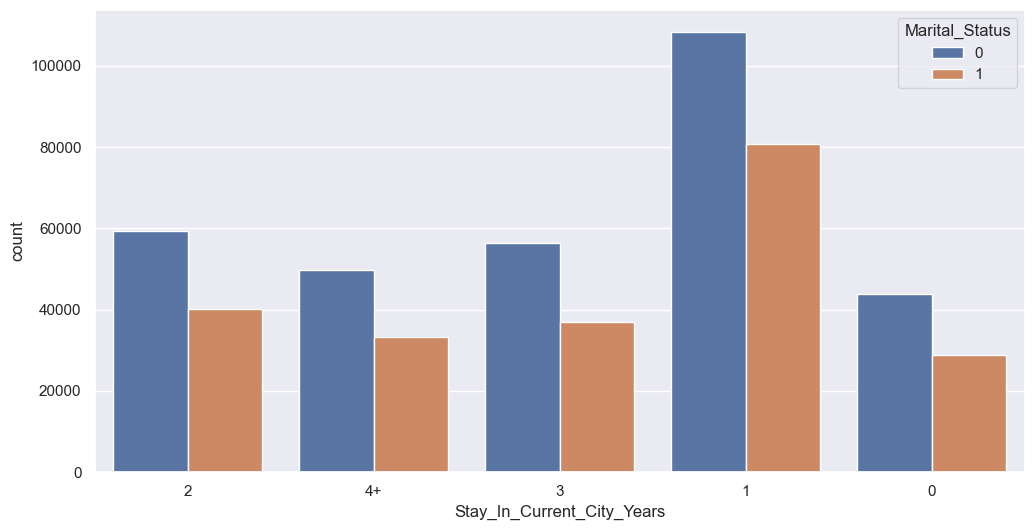

In [329]:
##adding the gender filter to the stay in current city years
sns.countplot(x = sales.Stay_In_Current_City_Years,hue = 'Marital_Status',data = sales)
plt.show()

<p>Unmarried People with 1 year experience in that city buy more products that other unmarried and same in the perception of the married also</p>

In [287]:
##columns in our dataset
sales.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Purchase'],
      dtype='object')

In [288]:
sales.dtypes

User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Product_Category_1             int64
Purchase                       int64
dtype: object

### Now lets analyze how the occupation of the people affects the purchase of the products in the sales

<p>In order to that , first we need to make a dataset that based on occupation the sales</p>

In [289]:
##first we will see what are the different occupation and their distribution looks like
sales.Occupation.unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6])

In [290]:
##number of occupational values in the datasset
sales.groupby('Occupation').size()

Occupation
0     68120
1     45971
2     25845
3     17366
4     70862
5     11985
6     19822
7     57806
8      1524
9      6153
10    12623
11    11338
12    30423
13     7548
14    26712
15    11812
16    24790
17    39090
18     6525
19     8352
20    32910
dtype: int64

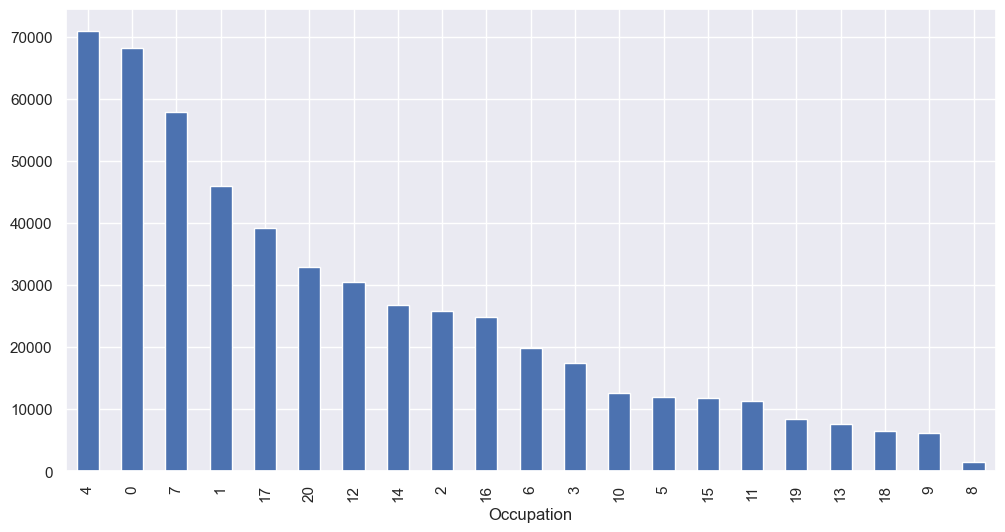

In [330]:
##we will try to plot the bar chart for this thing
sales.groupby('Occupation').size().sort_values(ascending=False).plot(kind = 'bar')
plt.show()

<p>So the people with occupation 4 are higher in number, now lets find the people with each of these occupations and their respective total purchases</p>

In [292]:
purchase_by_occupation = sales.groupby('Occupation').Purchase.sum().sort_values(ascending = False)
purchase_by_occupation.head()

Occupation
4     657530393
0     625814811
7     549282744
1     414552829
17    387240355
Name: Purchase, dtype: int64

<p>We understood that the people with occupation mainly 4 and 0 have the highest number of purchases till now . So we need to target those two occupation consisting people mainly</p>

<p>Now lets plot the purchases by Occupations as a plot</p>

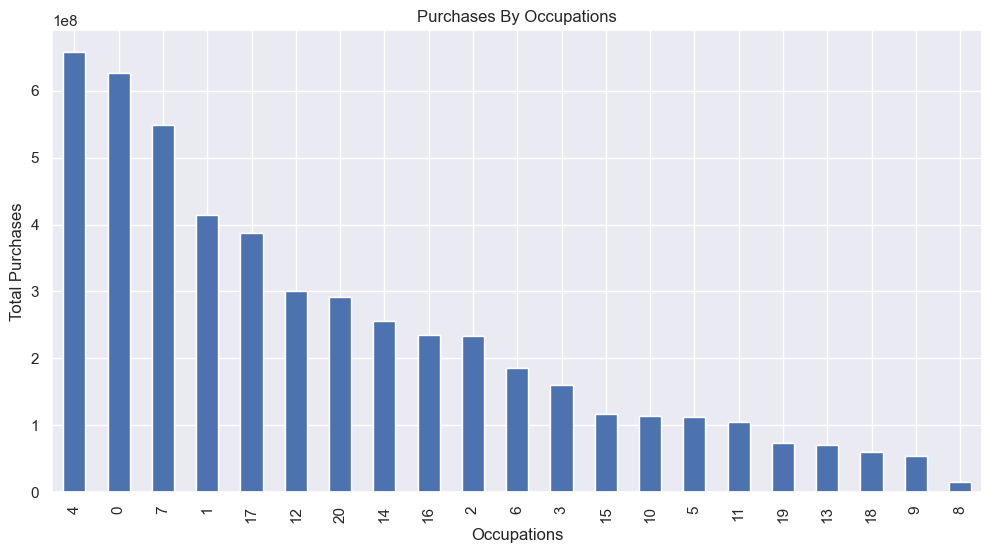

In [332]:
purchase_by_occupation.plot(kind = 'bar',title = 'Purchases By Occupations',xlabel='Occupations',ylabel = 'Total Purchases')
plt.show()

<p>We can also find the mean of the purchases in each occupation category</p>

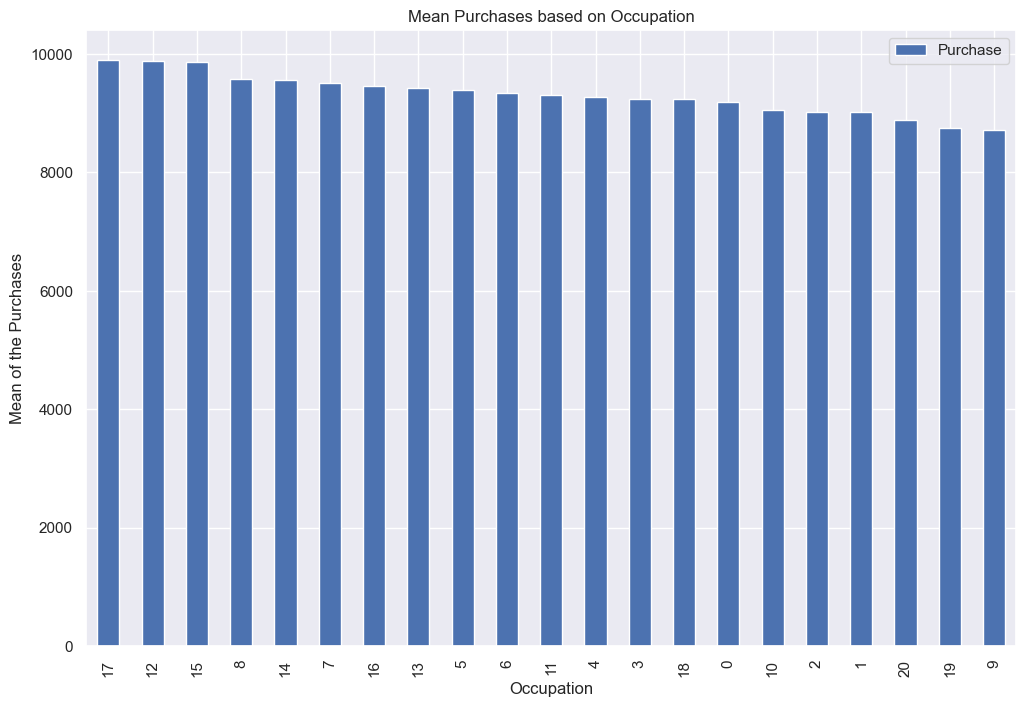

In [294]:
figure = sales.groupby('Occupation').Purchase.mean().sort_values(ascending = False).plot(kind = 'bar', xlabel = 'Occupation', ylabel = 'Mean of the Purchases', figsize = (12,8))
figure.set_title('Mean Purchases based on Occupation')
figure.legend()
plt.show()

<p>We saw that the mean purchases of the people with Occupation 17 is more also 12 and 15 </p>

#### Now we will analyze how the marital status will affects the sales through occupation

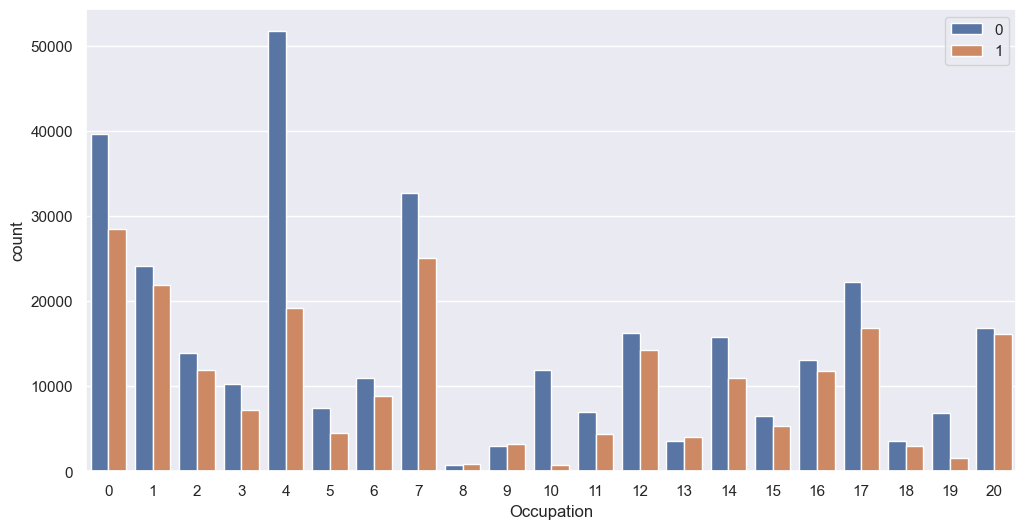

In [295]:
sns.countplot(x = 'Occupation',hue = 'Marital_Status',data = sales)
plt.legend()
plt.show()

<p>Now we understood that the Marital Status is also linked iwth the occupation</p>

<p>Now lets analyze what are the products that affected by the occupation of the people like using the product ID</p>

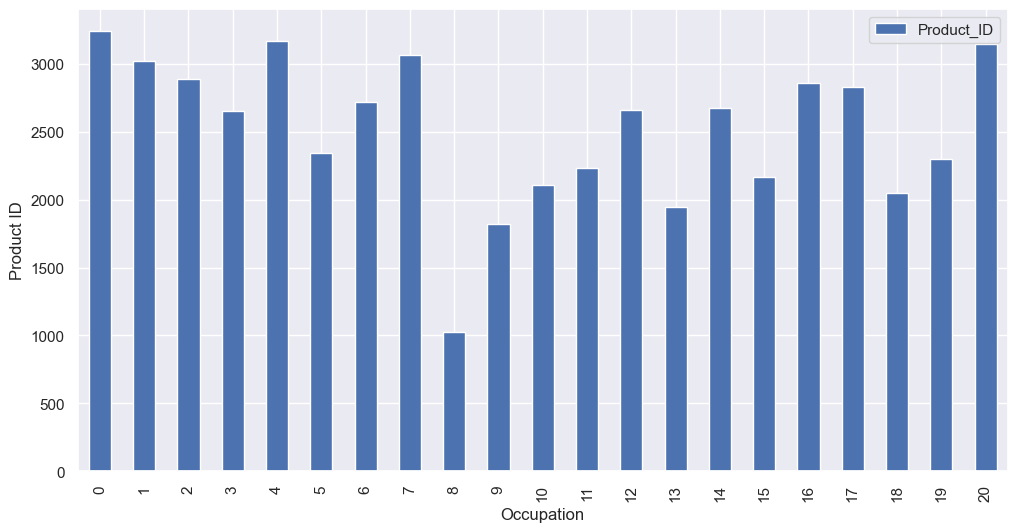

In [296]:
sales.groupby('Occupation').nunique().Product_ID.plot(kind = 'bar')
plt.xlabel("Occupation")
plt.ylabel('Product ID')
plt.legend(loc = 'upper right')
plt.show()

<p>Now we understood that the products that are purchased by the people who has different occupations i.e. How the occupation affects the type of Productions</p>

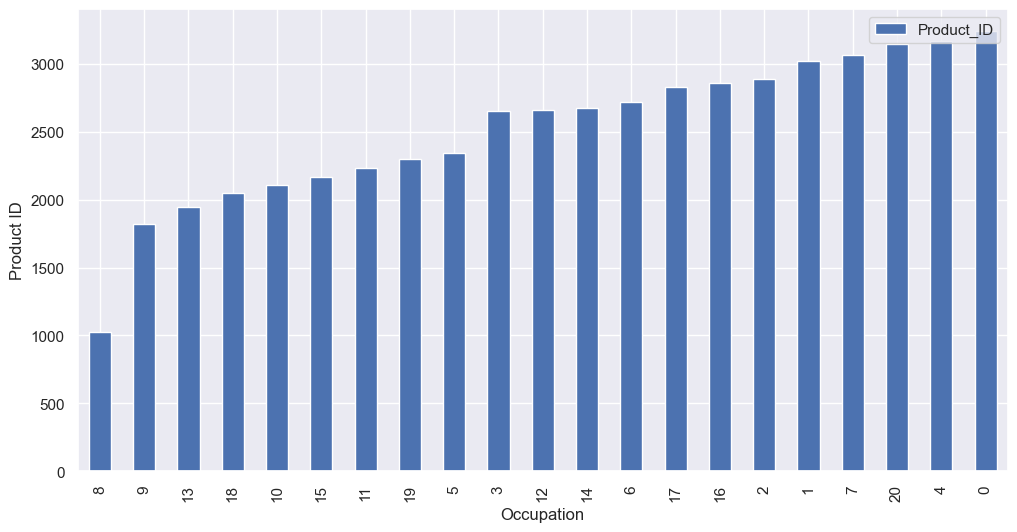

In [297]:
## now lets sort these bars according to the ascending order
sales.groupby('Occupation').nunique().Product_ID.sort_values(ascending = True).plot(kind = 'bar')
plt.xlabel("Occupation")
plt.ylabel('Product ID')
plt.legend(loc = 'upper right')
plt.show()

#### Now which product Categories produced least and most purchases in the black friday sales?


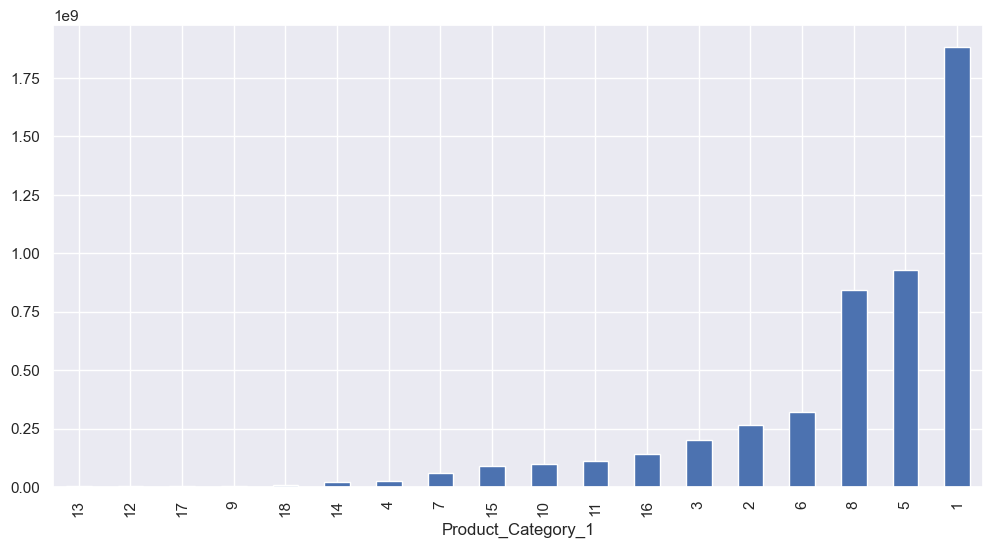

In [298]:
sales.groupby("Product_Category_1").Purchase.sum().sort_values().plot(kind = 'bar')
plt.show()

<p>From this we understood that the Product Category 1 whose category is 1 has the highest total purchases in the sales and for 13,12,17,9,18 had almost no total purchases in the sales</p>

<p>Now lets find the mean purchases in the same typo</p>

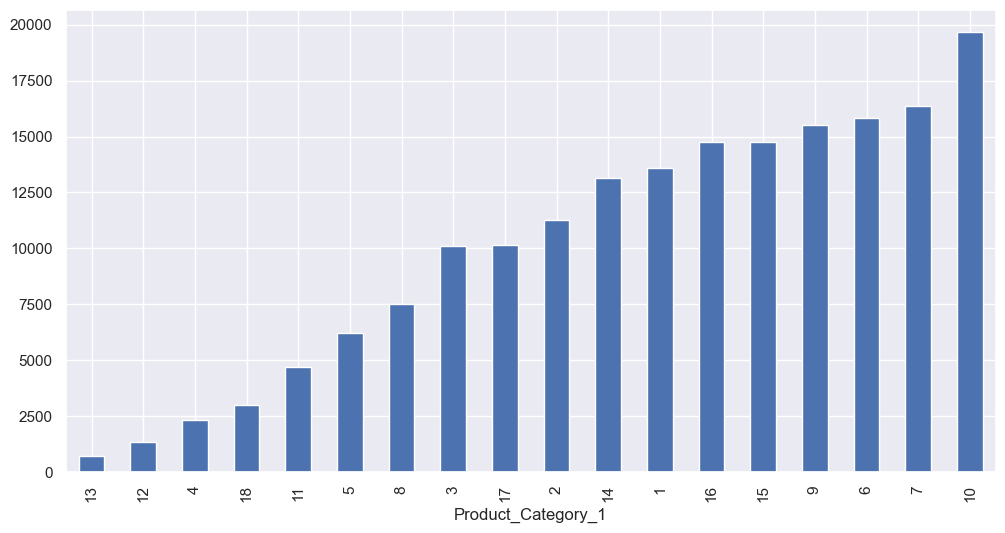

In [299]:
sales.groupby("Product_Category_1").Purchase.mean().sort_values().plot(kind = 'bar')
plt.show()

<p>Lets take the top 10 product ID 's that has the total purchases</p>

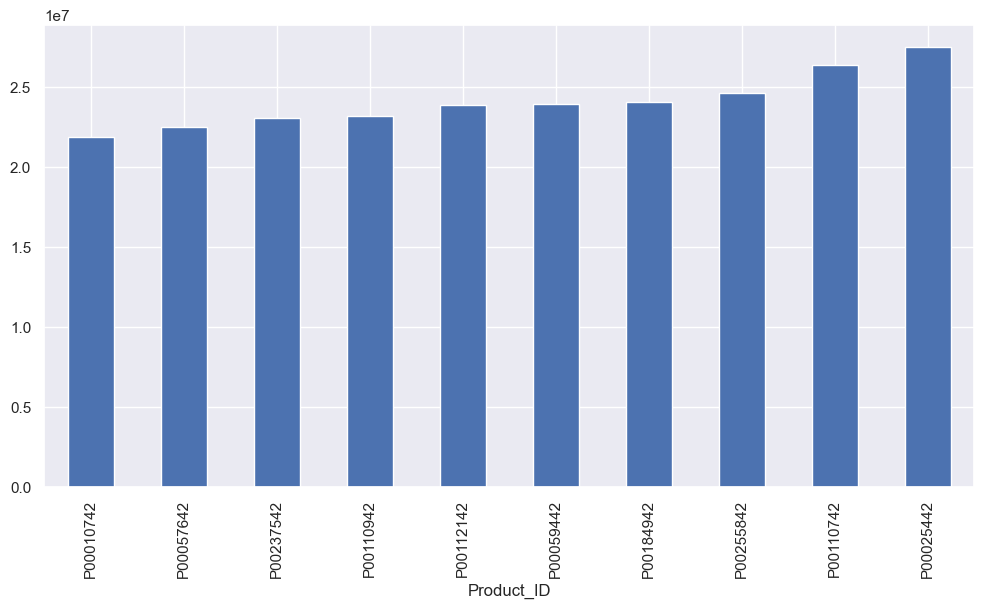

In [300]:
sales.groupby("Product_ID").Purchase.sum().nlargest(10).sort_values().plot(kind = 'bar')
plt.show()

<p>Lets see the size of the Product ID's in the sales</p>

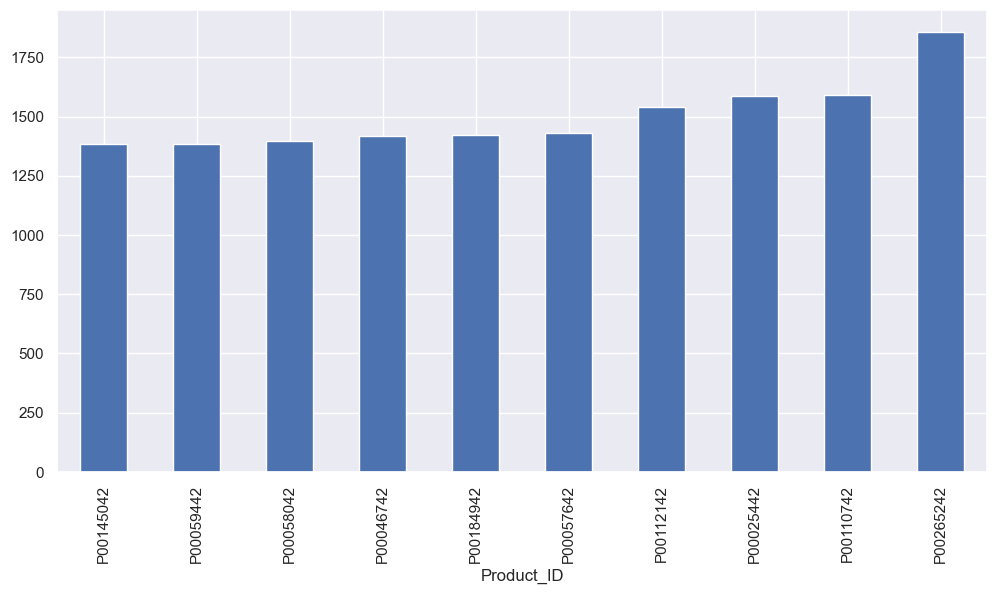

In [301]:
sales.groupby('Product_ID').size().nlargest(10).sort_values().plot(kind = 'bar')
plt.show()

<p>Lets find the mean purchases with the parameter product ID like how the Product ID affects the mean purchases like purchases only </p>

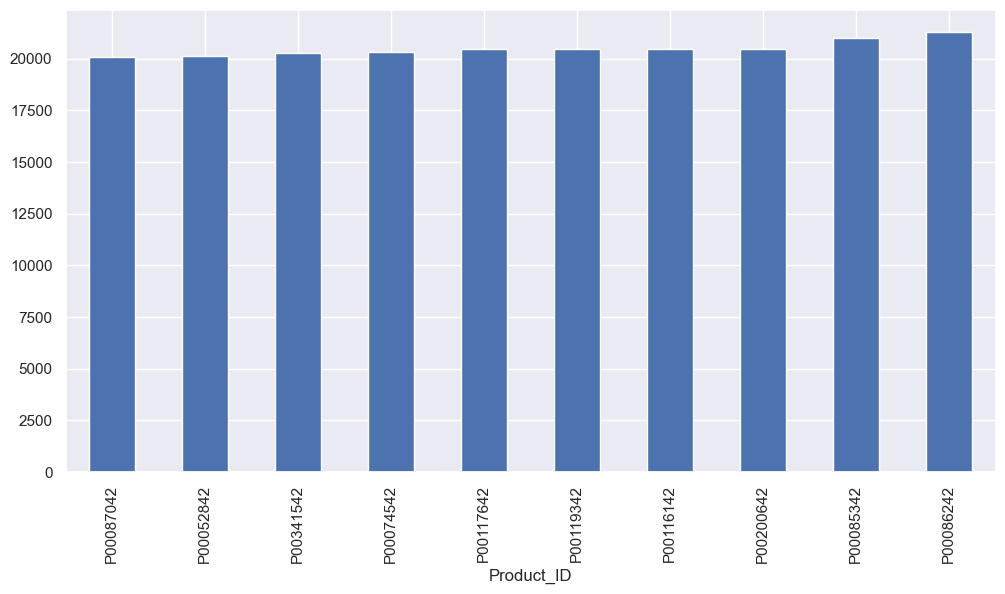

In [302]:
sales.groupby('Product_ID').Purchase.mean().nlargest(10).sort_values().plot(kind = 'bar')
plt.show()

#### Now how the Gender affects the Product Category 1 

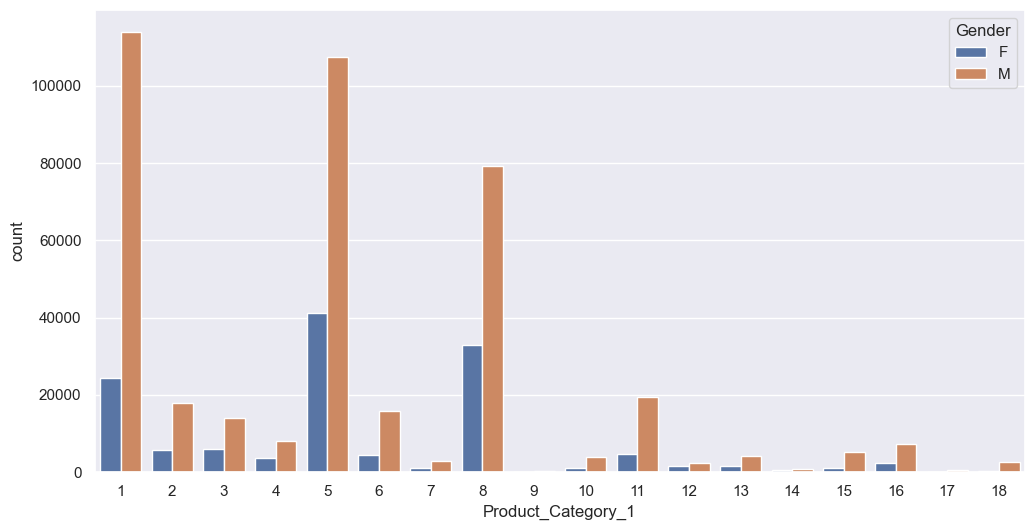

In [303]:
sns.countplot(x = 'Product_Category_1',hue = 'Gender',data = sales)
plt.show()

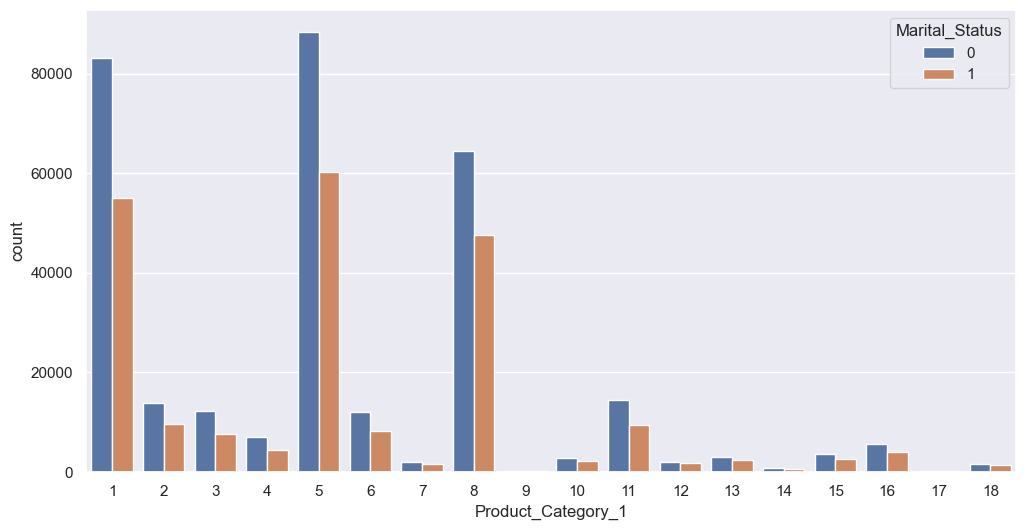

In [304]:
##Now affected by marital status
sns.countplot(x = 'Product_Category_1',hue = 'Marital_Status',data = sales)
plt.show()

### Combining Age and Marital Status

<p>lets see the relation between the age and the marital status of the people in the dataset</p>

In [305]:
#first few rows of the dataset
sales.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [306]:
#columns of the dataset
sales.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Purchase'],
      dtype='object')

<p>Creating a new column which tells us the marital status and gender at same time</p>

In [307]:
#lets create a list to store the values
list1 = []
#for each and every row value of gender and marital status combiane that
for i in range(len(sales)):
    list1.append(sales["Gender"][i] + "_" + str(sales['Marital_Status'][i]))
sales['Marital_Gender'] = list1


In [308]:
#now lets see the the few rows of the dataset
sales.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase,Marital_Gender
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370,F_0
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200,F_0
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422,F_0
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057,F_0
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969,M_0


In [309]:
#now lets see the column sin the dataset
sales.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Purchase', 'Marital_Gender'],
      dtype='object')

<p>Now lets plot the Marital Gender as the count plot</p>

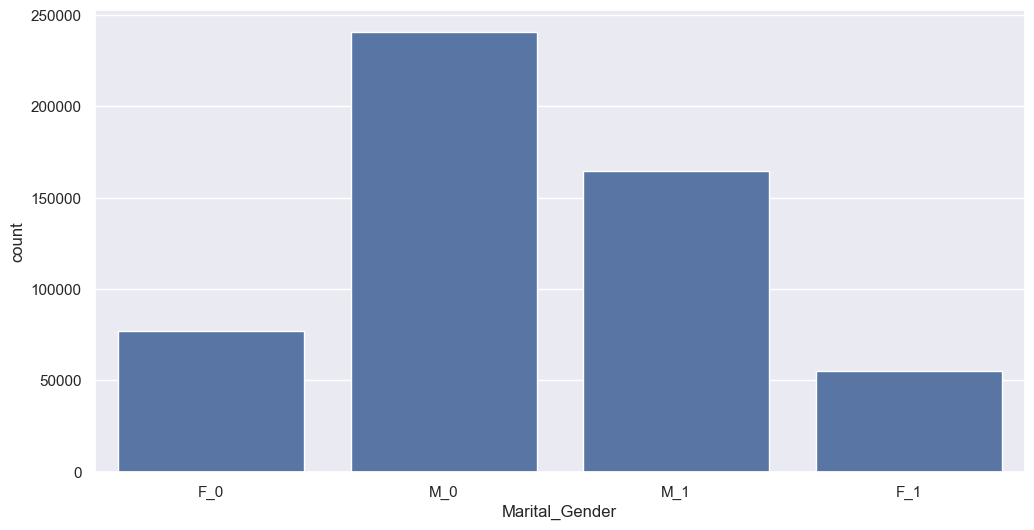

In [310]:
sns.countplot(x = sales['Marital_Gender'])
plt.show()

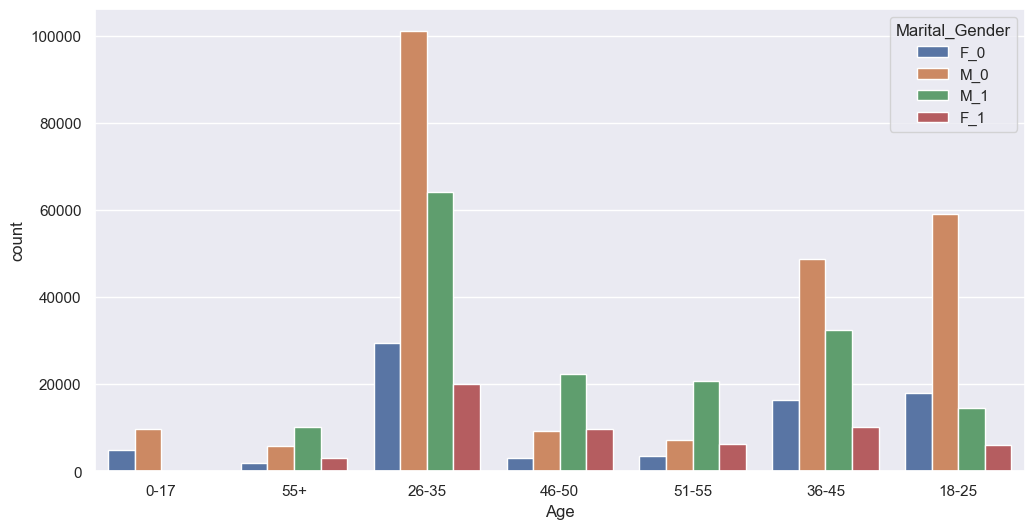

In [311]:
#lets plto the marital gender based on the age
sns.countplot(x = sales['Age'],hue = sales['Marital_Gender'])
plt.show()

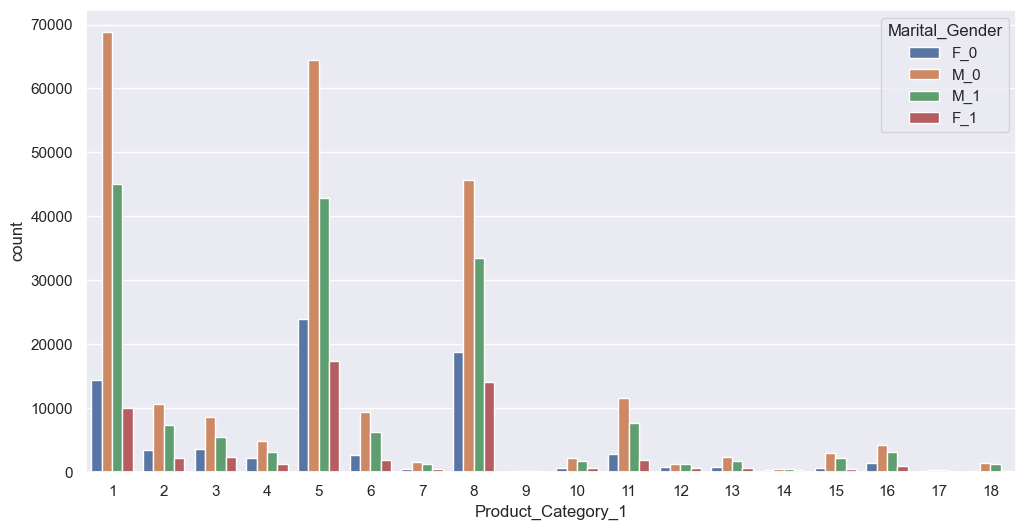

In [312]:
#now lets plot like which marital gender purchase which type of products like what is the category
#that the marital gender purchase belongs to
sns.countplot(x = sales['Product_Category_1'],hue = sales['Marital_Gender'])
plt.show()

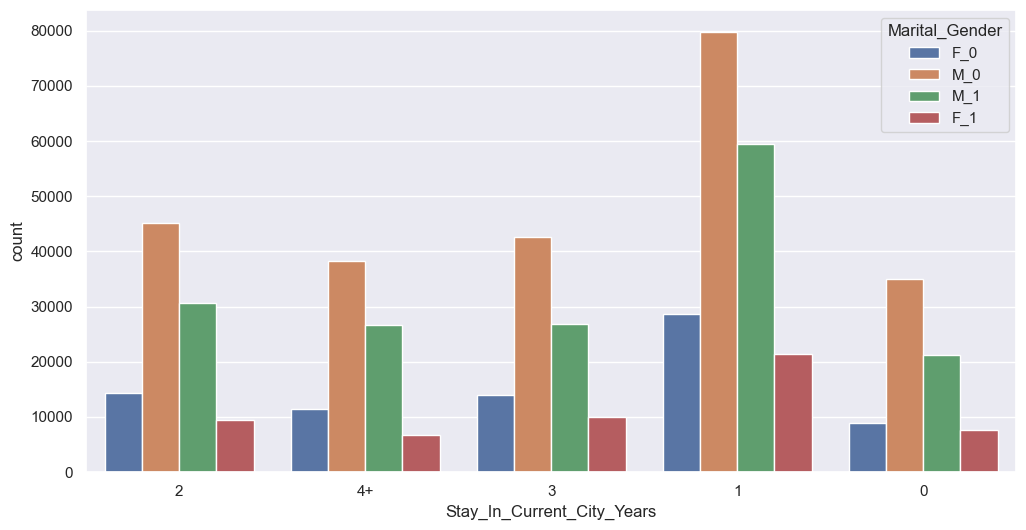

In [313]:
#now lets see the marital gender years of living in the city
sns.countplot(x = sales['Stay_In_Current_City_Years'],hue = sales['Marital_Gender'])
plt.show()

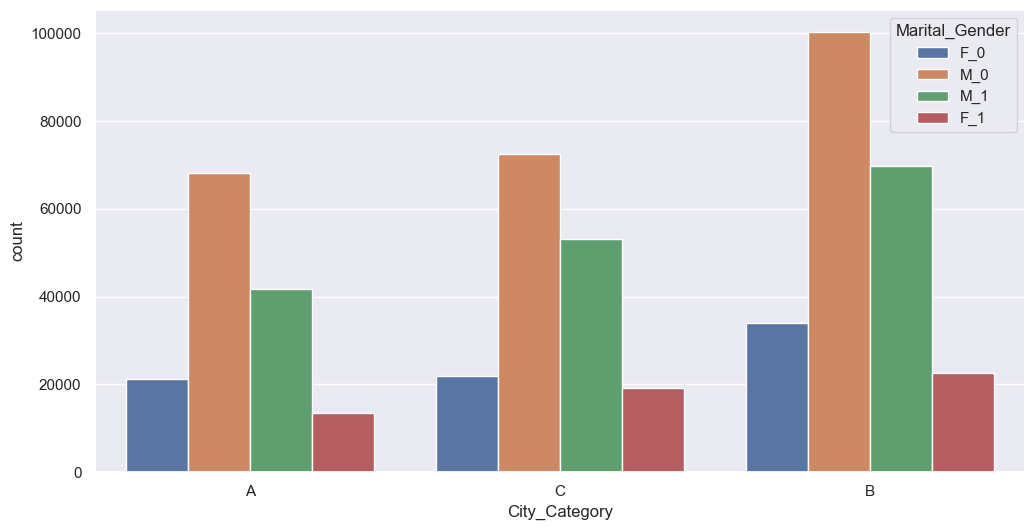

In [314]:
#now lets see Which city category does the marital gender belongs to 
sns.countplot(x = sales['City_Category'],hue = sales['Marital_Gender'])
plt.show()